# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10], 'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

In [2]:
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [3]:
# Your code here.
import matplotlib.pyplot as plt
import seaborn as sns

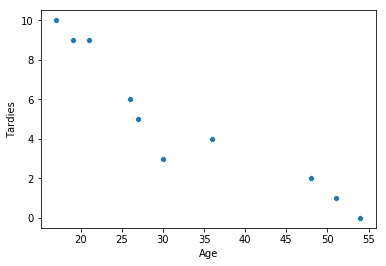

In [4]:
sns.scatterplot(x='Age', y='Tardies', data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [7]:
# Tardies and Age do indeed seem to be inversely proportional

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
student_data[['Age','Tardies']].corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [9]:
student_data[['Age','Tardies']].cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
#Using nothing but feith

Age = student_data['Age']
Tardies = 10 - Age*(10/55)

Plot your regression model on your scatter plot.

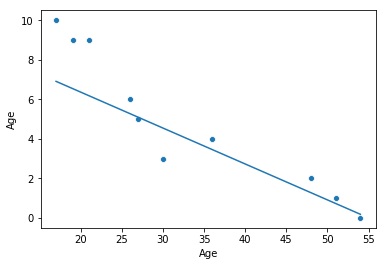

In [11]:
# Your code here.

sns.scatterplot(x='Age', y='Tardies', data=student_data)
sns.lineplot(Age, Tardies)

In [ ]:
#now, lets realy adjust a model

In [12]:
from scipy import stats

X = student_data['Age']
Y = student_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


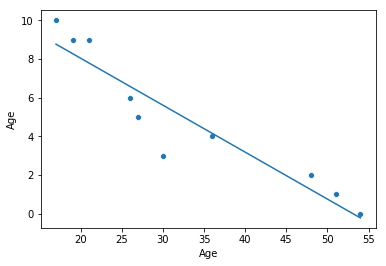

In [13]:
Age = student_data['Age']
Tardies = 12.89 - Age*(0.2428)

sns.scatterplot(x='Age', y='Tardies', data=student_data)
sns.lineplot(Age, Tardies)

Interpret the results of your model. What conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [14]:
# Yes, the age is a good predictor of tardiness according to our data.
print('std_err: ' + str(std_err))
print('p-value: ' + str(p_value))
print('p-value < alpha (0.05), we can reject the null hypotesis (H0). Then there is strong evidence that we can use age as a predictor to tardiness')

std_err: 0.03139728816158607
p-value: 5.56665383455343e-05
p-value < alpha (0.05), we can reject the null hypotesis (H0). Then there is strong evidence that we can use age as a predictor to tardiness


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [15]:
# Import any libraries you may need & the data
ve = pd.read_csv('vehicles.csv')

ve.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [16]:
ve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
Make                       35952 non-null object
Model                      35952 non-null object
Year                       35952 non-null int64
Engine Displacement        35952 non-null float64
Cylinders                  35952 non-null float64
Transmission               35952 non-null object
Drivetrain                 35952 non-null object
Vehicle Class              35952 non-null object
Fuel Type                  35952 non-null object
Fuel Barrels/Year          35952 non-null float64
City MPG                   35952 non-null int64
Highway MPG                35952 non-null int64
Combined MPG               35952 non-null int64
CO2 Emission Grams/Mile    35952 non-null float64
Fuel Cost/Year             35952 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 4.1+ MB


In [17]:
Y = ve['CO2 Emission Grams/Mile']
X = ve.copy()._get_numeric_data().drop(columns=['CO2 Emission Grams/Mile', 'Engine Displacement'])
X.head()

,Year,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,Fuel Cost/Year
0,1984,4.0,19.388824,18,17,17,1950
1,1984,6.0,25.354615,13,13,13,2550
2,1985,4.0,20.600625,16,17,16,2100
3,1985,6.0,25.354615,13,13,13,2550
4,1987,6.0,20.600625,14,21,16,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [18]:
# Your response here. 
ve.corr()['CO2 Emission Grams/Mile']

Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [19]:
# Your response here. 

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(X,Y)


In [20]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.2419996   2.54108292 18.19417542  0.93441998 -2.536898   -1.52217133
  0.03345137]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
lm
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [51]:
# Your code here.
df= pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

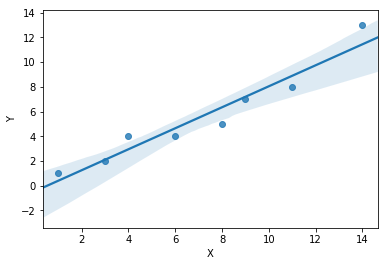

In [54]:
# Your code here.
sns.regplot(x="X", y="Y", data=df)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [56]:
X = df['X']
Y = df['Y']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept)) 

The slope is: 0.8484848484848485
The intercept is: -0.43939393939393945


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
#No

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 